In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

: 

In [14]:
model = 'bert'
results = pd.read_csv('experiment_results.csv')
results = results[results['model']==model]

In [15]:
exp_ids = results['timestamp'].unique()
results_top = pd.DataFrame()
for exp_id in exp_ids:
    exp_results = results[results['timestamp']==exp_id]
    top_epoch = exp_results[exp_results['val_acc']==exp_results['val_acc'].max()].head(1)
    results_top = pd.concat((results_top, top_epoch), ignore_index=True)
results_top.rename(columns={'epoch': 'best_epoch'})
results_top.sort_values(by='val_acc', inplace=True, ascending=False)

results_top_10 = results_top.head(10)
top_10_ids = results_top_10['timestamp'].values

In [16]:
results_top_10

,epoch,train_loss,val_loss,val_acc,hidden_dim,learning_rate,num_epochs,batch_size,n_layers,model,input_dim,timestamp
22,24,0.795471,0.779564,0.770270,256,0.0005,25,1024,2,bert,768,1670028149
24,24,0.807800,0.789313,0.756643,256,0.0005,25,1024,4,bert,768,1670028239
39,24,0.795885,0.791644,0.755593,512,0.0005,25,1024,4,bert,768,1670028911
37,23,0.803587,0.803167,0.745015,512,0.0005,25,1024,2,bert,768,1670028820
10,24,0.785998,0.805110,0.743919,128,0.0050,25,1024,0,bert,768,1670027617
35,23,0.792057,0.805836,0.742159,512,0.0005,25,1024,0,bert,768,1670028730
42,22,0.829134,0.816133,0.739303,512,0.0050,25,1024,2,bert,768,1670029047
36,24,0.788560,0.814599,0.733755,512,0.0005,25,1024,1,bert,768,1670028775
11,11,0.850381,0.819891,0.727096,128,0.0050,25,1024,1,bert,768,1670027661
38,23,0.830273,0.824102,0.724507,512,0.0005,25,1024,3,bert,768,1670028866


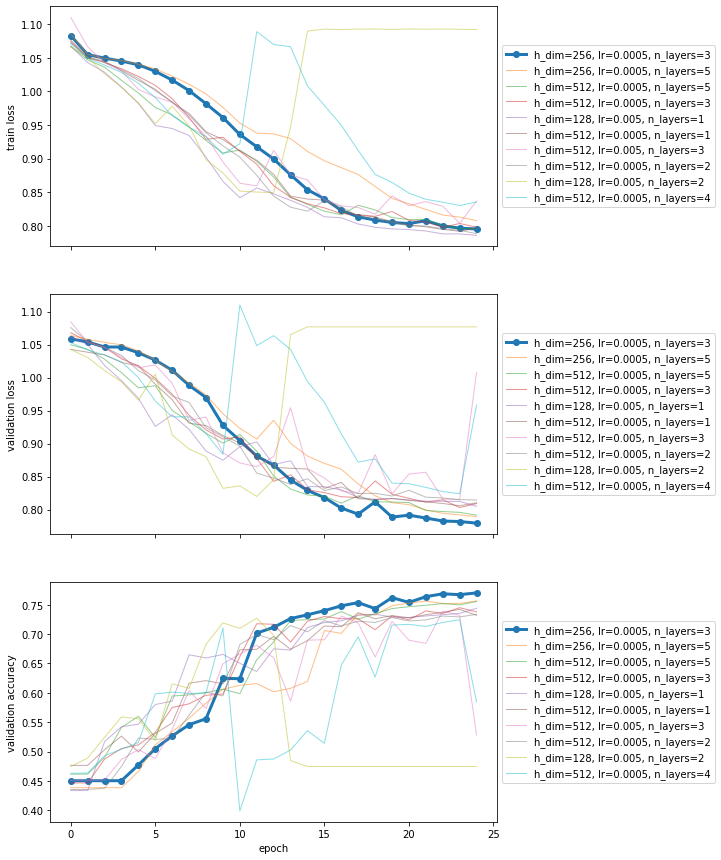

In [17]:
fig, axs = plt.subplots(3, 1, figsize=(8, 15), sharex=True)
for exp_id in top_10_ids:
    if exp_id == top_10_ids[0]:
        alpha = 1
        width = 3
        marker = 'o'
    else:
        alpha = 0.5
        width = 1
        marker = None

    exp_results = results[results['timestamp']==exp_id]
    h_dim, lr, n_layers = exp_results[['hidden_dim', 'learning_rate', 'n_layers']].iloc[0,:].values
    n_layers += 1
    label = f'h_dim={int(h_dim)}, lr={lr}, n_layers={int(n_layers)}'

    axs[0].plot(exp_results['epoch'], exp_results['train_loss'], label=label, linewidth=width, alpha=alpha, marker=marker)
    axs[1].plot(exp_results['epoch'], exp_results['val_loss'], label=label, linewidth=width, alpha=alpha, marker=marker)
    axs[2].plot(exp_results['epoch'], exp_results['val_acc'], label=label, linewidth=width, alpha=alpha, marker=marker)

axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axs[2].legend(loc='center left', bbox_to_anchor=(1, 0.5))

axs[0].set_ylabel('train loss')
axs[1].set_ylabel('validation loss')
axs[2].set_ylabel('validation accuracy')
axs[2].set_xlabel('epoch')

plt.show()